# Usage (quick version)

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
import warnings

In [3]:
import covsirphy as cs
cs.__version__

'2.8.1'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

Retrieving datasets from COVID-19 Data Hub: https://covid19datahub.io/


Detailed citaition list:

Open Government Data, United Kingdom (2020), https://coronavirus.data.gov.uk
World Health Organization (2020), https://covid19.who.int
The COVID Tracking Project (2020), https://covidtracking.com
Open Government Data, Latvia (2020), https://data.gov.lv/dati/dataset
Wikipedia (2020), https://en.wikipedia.org/wiki
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be
Johns Hopkins Center for Systems Science and Engineering (2020), https://github.com/CSSEGISandData/COVID-19
Covid19data.com.au (2020), https://github.com/M3IT/COVID-19_Data
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/dsfsi/covid19za
COVID-19_plus_Russia GitHub repository (2020), https://github.com/grwlf/COVID-19_plus_Russia
COVID-19 Peru Data Repository (2020), https://github.com/jmcastagnetto/covid-19-peru-data
The New York Times (2020), https://github.com/nytimes/covid-19-data
Open Government Data, Liechtenstein (2020), https://github.com/openZH/covid

### The number of cases (JHU style)

In [5]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [6]:
print(data_loader.covid19dh_citation)

Open Government Data, United Kingdom (2020), https://coronavirus.data.gov.uk
World Health Organization (2020), https://covid19.who.int
The COVID Tracking Project (2020), https://covidtracking.com
Open Government Data, Latvia (2020), https://data.gov.lv/dati/dataset
Wikipedia (2020), https://en.wikipedia.org/wiki
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be
Johns Hopkins Center for Systems Science and Engineering (2020), https://github.com/CSSEGISandData/COVID-19
Covid19data.com.au (2020), https://github.com/M3IT/COVID-19_Data
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/dsfsi/covid19za
COVID-19_plus_Russia GitHub repository (2020), https://github.com/grwlf/COVID-19_plus_Russia
COVID-19 Peru Data Repository (2020), https://github.com/jmcastagnetto/covid-19-peru-data
The New York Times (2020), https://github.com/nytimes/covid-19-data
Open Government Data, Liechtenstein (2020), https://github.com/openZH/covid

In [7]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
193650,2020-08-28,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
193651,2020-08-29,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
193652,2020-08-30,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
193653,2020-08-31,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
193654,2020-09-01,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [8]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
193650,2020-08-28,Colombia,Vichada,14,2,0,12
193651,2020-08-29,Colombia,Vichada,14,2,0,12
193652,2020-08-30,Colombia,Vichada,14,2,0,12
193653,2020-08-31,Colombia,Vichada,14,2,0,12
193654,2020-09-01,Colombia,Vichada,14,2,0,12


In [9]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
162,2020-08-28,20322,2959,358,17005
163,2020-08-29,20569,2800,358,17411
164,2020-08-30,20717,2827,360,17530
165,2020-08-31,20817,2784,363,17670
166,2020-09-01,20987,2764,364,17859


In [10]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-08-28,24632710,7674727,837735,16120248,0.017005,0.327212,0.049401
2020-08-29,24892072,7719109,842821,16330142,0.016930,0.328019,0.049078
2020-08-30,25104030,7724436,846458,16533136,0.016859,0.329292,0.048704
2020-08-31,25346943,7780046,850082,16716815,0.016769,0.329760,0.048391
2020-09-01,25347603,7779322,850098,16718183,0.016769,0.329778,0.048388


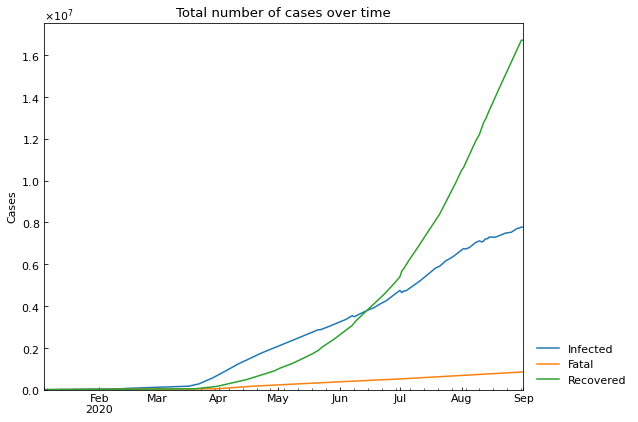

In [11]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan


In [12]:
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
201,2020-08-28,66557,11321,1260,53976
202,2020-08-29,67400,10808,1271,55321
203,2020-08-30,67999,10570,1285,56144
204,2020-08-31,68436,10350,1299,56787
205,2020-09-01,69069,9939,1314,57816


In [13]:
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan

In [14]:
jhu_data.replace(japan_data)
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
199,2020-08-28,65573,10340,1238,53995
200,2020-08-29,66423,9827,1255,55341
201,2020-08-30,67264,9836,1264,56164
202,2020-08-31,67865,9784,1279,56802
203,2020-09-01,68392,9273,1296,57823


### Population in each country

In [15]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [16]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
193650,2020-08-28,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
193651,2020-08-29,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
193652,2020-08-30,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
193653,2020-08-31,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
193654,2020-09-01,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [17]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
189954,COL,Colombia,Vichada,2020-08-28,107808
189955,COL,Colombia,Vichada,2020-08-29,107808
189956,COL,Colombia,Vichada,2020-08-30,107808
189957,COL,Colombia,Vichada,2020-08-31,107808
189958,COL,Colombia,Vichada,2020-09-01,107808


In [18]:
population_data.value("Japan", province=None)

126529100

In [19]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)

In [20]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [21]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
193650,2020-08-28,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
193651,2020-08-29,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
193652,2020-08-30,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
193653,2020-08-31,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
193654,2020-09-01,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [22]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
193650,2020-08-28,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
193651,2020-08-29,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
193652,2020-08-30,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
193653,2020-08-31,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
193654,2020-09-01,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04


In [23]:
# Subset for a country
oxcgrt_data.subset("Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
237,2020-08-28,1,1,1,0,0,1,1,3,2,1,2,30.56
238,2020-08-29,1,1,1,0,0,1,1,3,2,1,2,30.56
239,2020-08-30,1,1,1,0,0,1,1,3,2,1,2,30.56
240,2020-08-31,1,1,1,0,0,1,1,3,2,1,2,30.56
241,2020-09-01,1,1,1,0,0,1,1,3,2,1,2,30.56


In [24]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset("JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
237,2020-08-28,1,1,1,0,0,1,1,3,2,1,2,30.56
238,2020-08-29,1,1,1,0,0,1,1,3,2,1,2,30.56
239,2020-08-30,1,1,1,0,0,1,1,3,2,1,2,30.56
240,2020-08-31,1,1,1,0,0,1,1,3,2,1,2,30.56
241,2020-09-01,1,1,1,0,0,1,1,3,2,1,2,30.56


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [25]:
scenario = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records

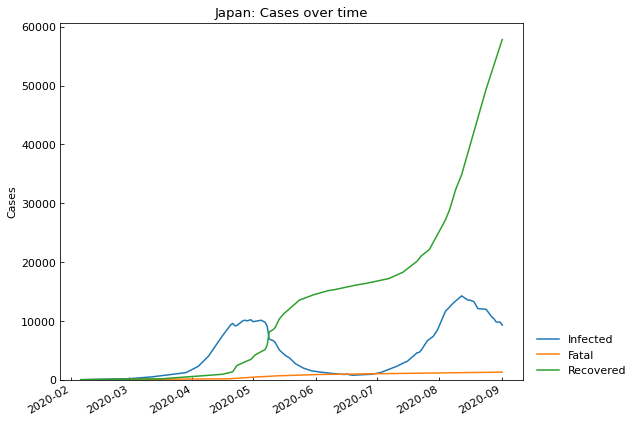

,Date,Confirmed,Infected,Fatal,Recovered
199,2020-08-28,65573,10340,1238,53995
200,2020-08-29,66423,9827,1255,55341
201,2020-08-30,67264,9836,1264,56164
202,2020-08-31,67865,9784,1279,56802
203,2020-09-01,68392,9273,1296,57823


In [26]:
import matplotlib
warnings.simplefilter("ignore", category=matplotlib.MatplotlibDeprecationWarning)
record_df = scenario.records()
record_df.tail()

### S-R trend analysis

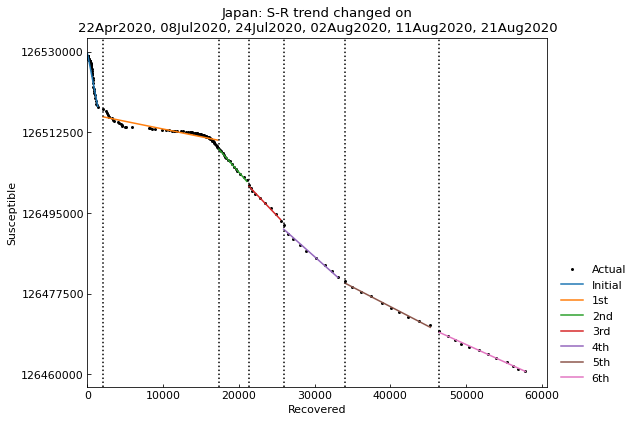

,Type,Start,End,Population
1st,Past,22Apr2020,07Jul2020,126529100
2nd,Past,08Jul2020,23Jul2020,126529100
3rd,Past,24Jul2020,01Aug2020,126529100
4th,Past,02Aug2020,10Aug2020,126529100
5th,Past,11Aug2020,20Aug2020,126529100
6th,Past,21Aug2020,01Sep2020,126529100


In [27]:
scenario.trend(set_phases=True)
scenario.summary()

### Hyperparameter estimation of ODE models
As an example, use SIR-F model.
We can use SIR, SIRD, (SIRFV), (SEWIRF).

In [28]:
scenario.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	6th phase (21Aug2020 - 01Sep2020): finished 1020 trials in 0 min 30 sec

	3rd phase (24Jul2020 - 01Aug2020): finished 1495 trials in 0 min 40 sec

	2nd phase (08Jul2020 - 23Jul2020): finished 1997 trials in 1 min  0 sec

	1st phase (22Apr2020 - 07Jul2020): finished 1893 trials in 1 min  0 sec

	4th phase (02Aug2020 - 10Aug2020): finished 1980 trials in 1 min  0 sec

	5th phase (11Aug2020 - 20Aug2020): finished 2109 trials in 1 min  0 sec

Completed optimization. Total: 2 min 11 sec

In [29]:
scenario.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/alpha2 [day],1/beta [day],alpha1 [-],1/gamma [day],RMSLE,Trials,Runtime
1st,Past,22Apr2020,07Jul2020,126529100,SIR-F,0.40,0.081515,0.000215,0.007294,0.016648,360,1164,34,0.082,15,0.950914,1893,1 min 0 sec
2nd,Past,08Jul2020,23Jul2020,126529100,SIR-F,2.01,0.000054,0.000060,0.033869,0.016781,360,4160,7,0.000,14,0.029265,1997,1 min 0 sec
3rd,Past,24Jul2020,01Aug2020,126529100,SIR-F,1.90,0.000629,0.000072,0.032966,0.017232,360,3487,7,0.001,14,0.020294,1495,0 min 40 sec
4th,Past,02Aug2020,10Aug2020,126529100,SIR-F,1.74,0.000250,0.000076,0.028312,0.016201,360,3296,8,0.000,15,0.034923,1980,1 min 0 sec
5th,Past,11Aug2020,20Aug2020,126529100,SIR-F,0.87,0.000532,0.000147,0.020293,0.023227,360,1696,12,0.001,10,0.020796,2109,1 min 0 sec
6th,Past,21Aug2020,01Sep2020,126529100,SIR-F,0.76,0.000292,0.000287,0.017222,0.022315,360,872,14,0.000,11,0.021268,1020,0 min 30 sec


### Accuracy of estimation

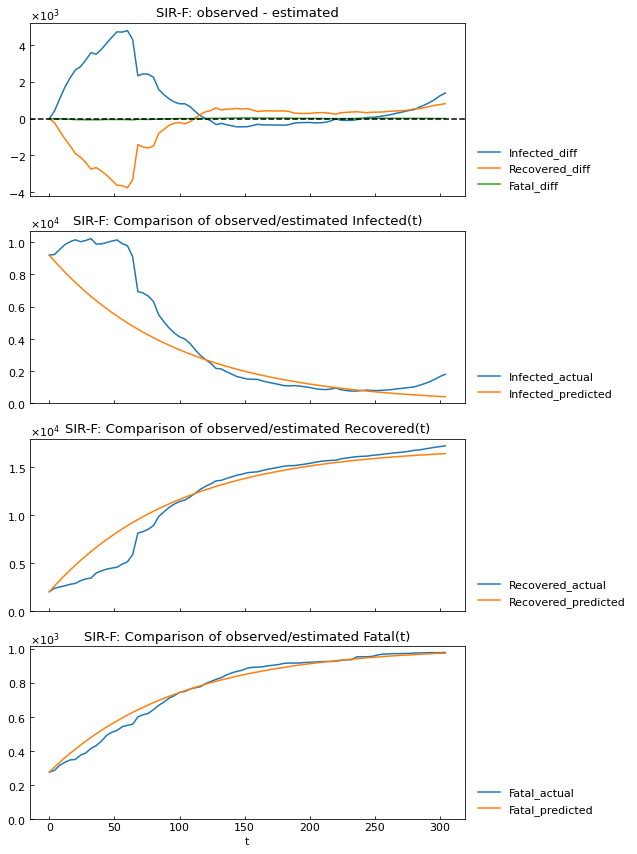

In [30]:
scenario.estimate_accuracy(phase="1st")

### Get parameter value

In [31]:
scenario.get("Rt", phase="4th")

1.74

### Show parameter history

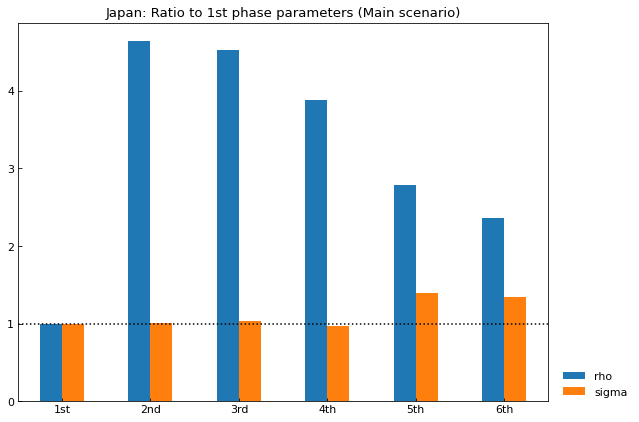

,1st,2nd,3rd,4th,5th,6th
rho,1.0,4.643344,4.519460,3.881399,2.782029,2.361075
sigma,1.0,1.008012,1.035086,0.973178,1.395188,1.340371


In [32]:
df = scenario.param_history(targets=["rho", "sigma"])
df.T

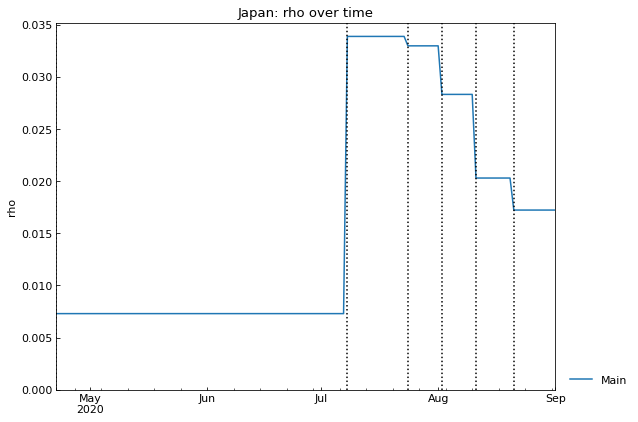

In [33]:
# version >= 2.8.0
_ = scenario.history(target="rho")

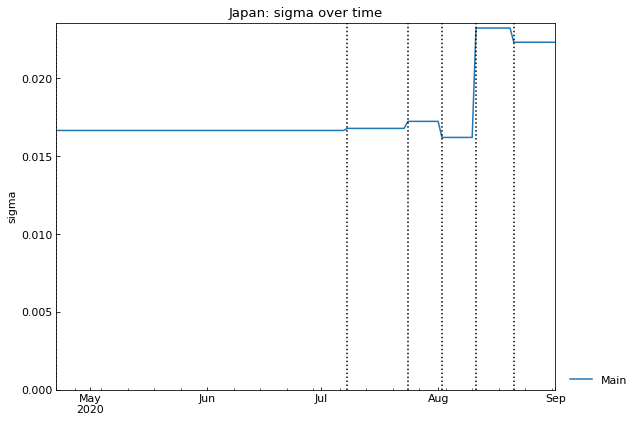

In [34]:
# version >= 2.8.0
_ = scenario.history(target="sigma")

### Show the history of reproduction number

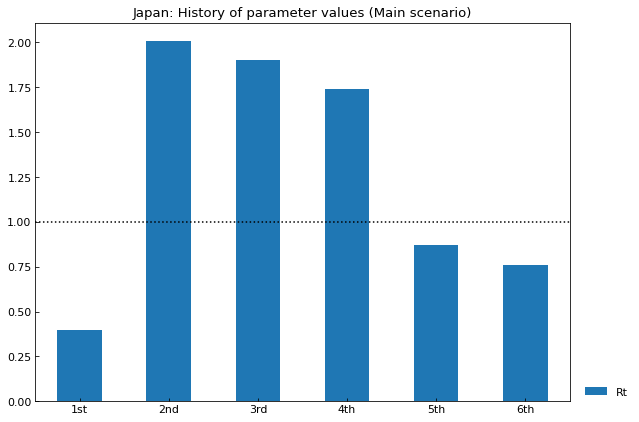

,1st,2nd,3rd,4th,5th,6th
Rt,0.4,2.01,1.9,1.74,0.87,0.76


In [35]:
df = scenario.param_history(targets=["Rt"], divide_by_first=False, show_box_plot=True)
df.T

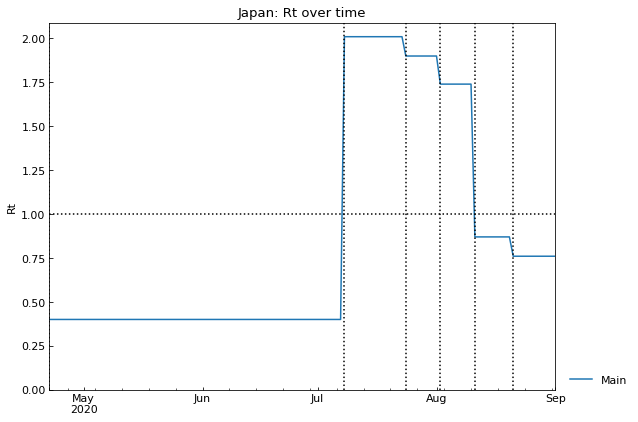

In [36]:
# version >= 2.8.0
_ = scenario.history(target="Rt")

### Simulate the number of cases

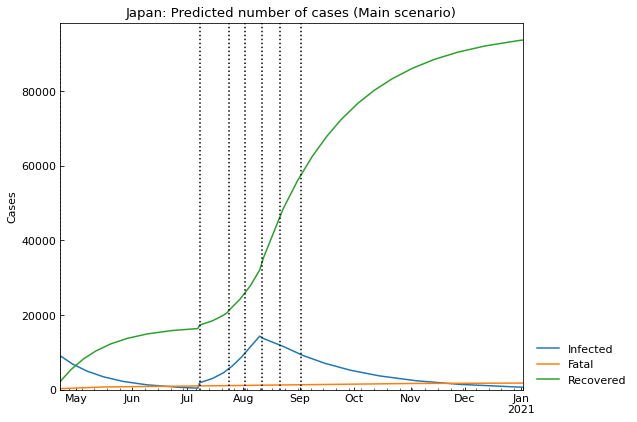

,Date,Confirmed,Fatal,Infected,Recovered
251,2020-12-29,95983,1769,733,93481
252,2020-12-30,96034,1770,718,93546
253,2020-12-31,96083,1771,702,93610
254,2021-01-01,96131,1772,687,93672
255,2021-01-02,96177,1772,673,93732


In [37]:
scenario.clear(name="Main")
scenario.add(end_date="01Jan2021", name="Main")
main_sim_df = scenario.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [38]:
sigma_current = scenario.get("sigma", name="Main", phase="last")
sigma_current

0.02231454981032848

In [39]:
sigma_new = sigma_current * 2
sigma_new

0.04462909962065696

In [40]:
scenario.clear(name="Medicine")
scenario.add(name="Medicine", days=30, sigma=sigma_current)
scenario.add(name="Medicine", end_date="01Jan2021", sigma=sigma_new)
scenario.summary()

Type      Start        End  Population    ODE    Rt  \
Scenario Phase                                                          
Main     1st      Past  22Apr2020  07Jul2020   126529100  SIR-F  0.40   
         2nd      Past  08Jul2020  23Jul2020   126529100  SIR-F  2.01   
         3rd      Past  24Jul2020  01Aug2020   126529100  SIR-F  1.90   
         4th      Past  02Aug2020  10Aug2020   126529100  SIR-F  1.74   
         5th      Past  11Aug2020  20Aug2020   126529100  SIR-F  0.87   
         6th      Past  21Aug2020  01Sep2020   126529100  SIR-F  0.76   
         7th    Future  02Sep2020  01Jan2021   126529100  SIR-F  0.76   
Medicine 1st      Past  22Apr2020  07Jul2020   126529100  SIR-F  0.40   
         2nd      Past  08Jul2020  23Jul2020   126529100  SIR-F  2.01   
         3rd      Past  24Jul2020  01Aug2020   126529100  SIR-F  1.90   
         4th      Past  02Aug2020  10Aug2020   126529100  SIR-F  1.74   
         5th      Past  11Aug2020  20Aug2020   126529100  SIR-F  0.87   
         6th      Past  21Aug2020  01Sep2020   126529100  SIR-F  0.76   
         7th    Future  02Sep2020  02Oct2020   126529100  SIR-F  0.76   
         8th    Future  03Oct2020  01Jan2021   126529100  SIR-F  0.38   

                   theta     kappa       rho     sigma  tau  1/alpha2 [day]  \
Scenario Phase                                                                
Main     1st    0.081515  0.000215  0.007294  0.016648  360            1164   
         2nd    0.000054  0.000060  0.033869  0.016781  360            4160   
         3rd    0.000629  0.000072  0.032966  0.017232  360            3487   
         4th    0.000250  0.000076  0.028312  0.016201  360            3296   
         5th    0.000532  0.000147  0.020293  0.023227  360            1696   
         6th    0.000292  0.000287  0.017222  0.022315  360             872   
         7th    0.000292  0.000287  0.017222  0.022315  360             872   
Medicine 1st    0.081515  0.000215  0.007294  0.016648  360            1164   
         2nd    0.000054  0.000060  0.033869  0.016781  360            4160   
         3rd    0.000629  0.000072  0.032966  0.017232  360            3487   
         4th    0.000250  0.000076  0.028312  0.016201  360            3296   
         5th    0.000532  0.000147  0.020293  0.023227  360            1696   
         6th    0.000292  0.000287  0.017222  0.022315  360             872   
         7th    0.000292  0.000287  0.017222  0.022315  360             872   
         8th    0.000292  0.000287  0.017222  0.044629  360             872   

                1/beta [day]  alpha1 [-]  1/gamma [day]      RMSLE Trials  \
Scenario Phase                                                              
Main     1st              34       0.082             15   0.950914   1893   
         2nd               7       0.000             14  0.0292651   1997   
         3rd               7       0.001             14  0.0202945   1495   
         4th               8       0.000             15  0.0349233   1980   
         5th              12       0.001             10  0.0207962   2109   
         6th              14       0.000             11  0.0212683   1020   
         7th              14       0.000             11          -      -   
Medicine 1st              34       0.082             15   0.950914   1893   
         2nd               7       0.000             14  0.0292651   1997   
         3rd               7       0.001             14  0.0202945   1495   
         4th               8       0.000             15  0.0349233   1980   
         5th              12       0.001             10  0.0207962   2109   
         6th              14       0.000             11  0.0212683   1020   
         7th              14       0.000             11          -      -   
         8th              14       0.000              5          -      -   

                     Runtime  
Scenario Phase                
Main     1st    1 min  0 sec  
         2nd    1 min  0 sec 

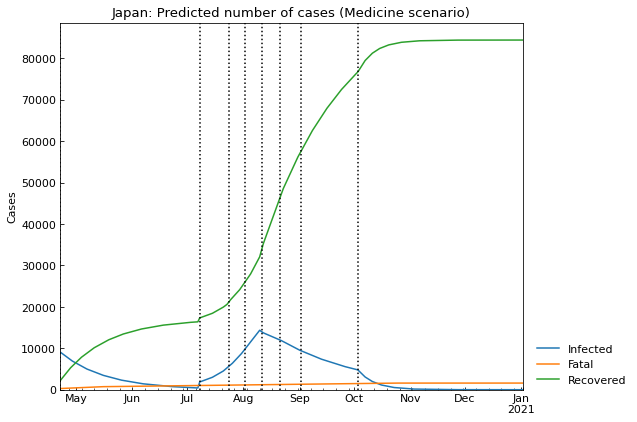

,Date,Confirmed,Fatal,Infected,Recovered
251,2020-12-29,86035,1600,0,84435
252,2020-12-30,86035,1600,0,84435
253,2020-12-31,86035,1600,0,84435
254,2021-01-01,86035,1600,0,84435
255,2021-01-02,86035,1600,0,84435


In [41]:
scenario.simulate(name="Medicine").tail()

### Compare the scenarios

In [42]:
scenario.describe()

,max(Infected),argmax(Infected),Infected on 02Jan2021,Fatal on 02Jan2021,8th_Rt
Main,14355,10Aug2020,673,1772,-
Medicine,14355,10Aug2020,0,1600,0.38


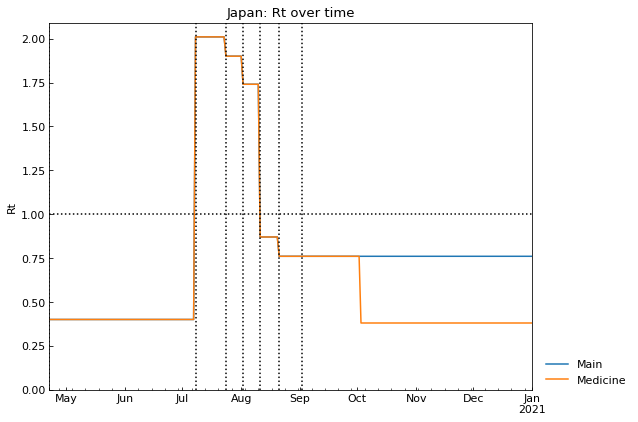

In [43]:
# version >= 2.8.0
_ = scenario.history(target="Rt")

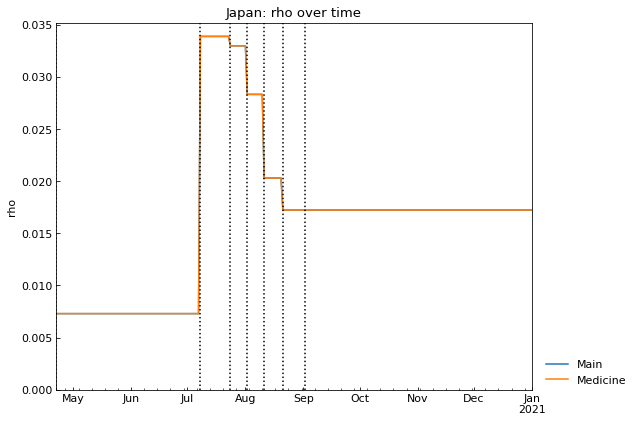

In [44]:
# version >= 2.8.0
_ = scenario.history(target="rho")

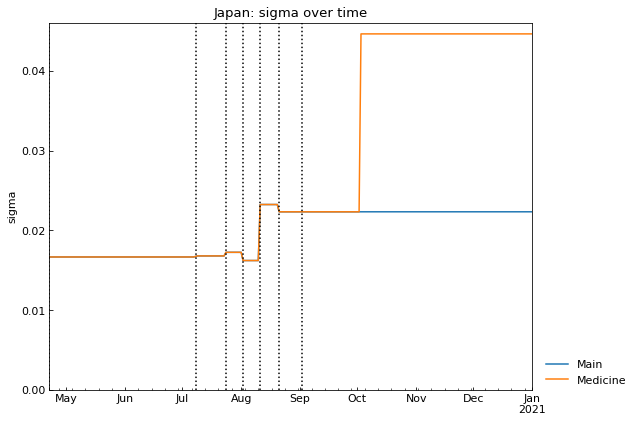

In [45]:
# version >= 2.8.0
_ = scenario.history(target="sigma")

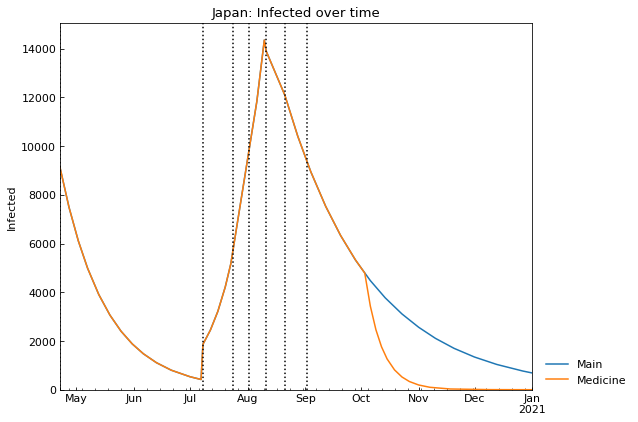

In [46]:
# version >= 2.8.0
_ = scenario.history(target="Infected")